# Board Game Review Predictor

## Importing the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading the Data 

In [ ]:
# Read in the data.
games = pd.read_csv("games.csv")
# Print the names of the columns in games.
print(games.columns)
print(games.shape)


Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


In [ ]:
# games[games["average_rating"] == 0]

# Print the first row of all the games with zero scores.
# The .iloc method on dataframes allows us to index by position.
print(games[games["average_rating"] == 0].iloc[0])
# Print the first row of all the games with scores greater than 0.
print(games[games["average_rating"] > 0].iloc[0])

# Remove any rows without user reviews.
games = games[games["users_rated"] > 0]
# Remove any rows with missing values.
games = games.dropna(axis=0)

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

## Making the Histogram

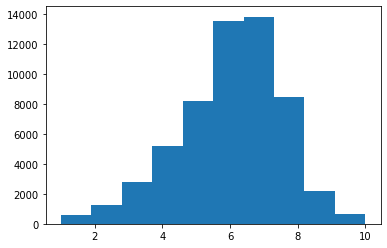

In [ ]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

In [ ]:
# Get all the columns from the dataframe.
columns = games.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

# Store the variable we'll be predicting on.
target = "average_rating"

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
train = games.sample(frac=0.8, random_state=1)
test = games.loc[~games.index.isin(train.index)]

# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


## Linear Regression model 

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(train[columns], train[target])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = LR.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

2.078819032629323

## Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
# Make predictions.
predictions = RFR.predict(test[columns])
# Compute the error.
mean_squared_error(predictions, test[target])

1.4458560046071653

## Predictions By Both Models

Predicting the Average Rting of any random Board game

In [ ]:
test[columns].iloc[100]

yearpublished     1995.0000
minplayers           3.0000
maxplayers           6.0000
playingtime        300.0000
minplaytime        300.0000
maxplaytime        300.0000
minage              14.0000
users_rated        995.0000
total_owners      1414.0000
total_traders       49.0000
total_wanters       88.0000
total_wishers      210.0000
total_comments     417.0000
total_weights      158.0000
average_weight       4.2532
Name: 521, dtype: float64

In [ ]:
#Actual average rating
test[target].iloc[100]

7.52018

In [ ]:
#prediction by linear regresion model
rating_LR = LR.predict(test[columns].iloc[100].values.reshape(1, -1))
print(rating_LR)

[7.57689957]


In [ ]:
#prediction by Random Forest regresion model
rating_RFR = RFR.predict(test[columns].iloc[100].values.reshape(1, -1))
print(rating_RFR)

[7.4041717]
